# Semiconductor manufacturing process dataset

## Project Description
Source: https://www.kaggle.com/saurabhbagchi/fmst-semiconductor-manufacturing-project

A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning, and reduce per-unit production costs. These signals can be used as features to predict the yield type. And by analyzing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

Dataset: SemiconductorManufacturingProcessDataset.csv (on Canvas)

Later, we will learn how to apply PCA (Principal Component Analyses) for feature selection; then we will apply ANN to predict the Pass/Fail. in this exercise our objective is to repeat the same steps we did above for Supplier Data: Cleaning & Scaling Data, Encode Categorical Data, Split the Data to Training & Test Sets. 

## Importing the Libraries

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [94]:
dataset = pd.read_csv('SemiconductorManufacturingProcessDataset.csv')

## Showing the Dataset in a Table

In [95]:
pd.DataFrame(dataset)
#dataset

,Time,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,...,Sensor 429,Sensor 430,Sensor 431,Sensor 432,Sensor 433,Sensor 434,Sensor 435,Sensor 436,Sensor 437,Pass/Fail
0,7/19/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,Pass
1,7/19/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,Pass
2,7/19/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,Fail
3,7/19/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,Pass
4,7/19/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,10/16/2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,Pass
1563,10/16/2008 20:49,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,Pass
1564,10/17/2008 5:26,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,Pass
1565,10/17/2008 6:01,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,Pass


## A Quick Review of the Data

In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 439 entries, Time to Pass/Fail
dtypes: float64(437), object(2)
memory usage: 5.2+ MB


## Seperate The Input and Output
Here, we put the independent variables in X and the dependent variable in y. 

In [97]:
X = dataset.iloc[:, 1:438].values
y = dataset.iloc[:, -1].values

## Showing the Input Data in a Table format

In [98]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,NaN,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


## A Quick Check of the Output Data

In [99]:
pd.DataFrame(y)

,0
0,Pass
1,Pass
2,Fail
3,Pass
4,Pass
...,...
1562,Pass
1563,Pass
1564,Pass
1565,Pass


## Taking care of missing data

In [100]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [101]:
# A quick check
print(X)

[[3.03093000e+03 2.56400000e+03 2.18773330e+03 ... 1.64749042e-02
  5.28333333e-03 9.96700663e+01]
 [3.09578000e+03 2.46514000e+03 2.23042220e+03 ... 2.01000000e-02
  6.00000000e-03 2.08204500e+02]
 [2.93261000e+03 2.55994000e+03 2.18641110e+03 ... 4.84000000e-02
  1.48000000e-02 8.28602000e+01]
 ...
 [2.97881000e+03 2.37978000e+03 2.20630000e+03 ... 8.60000000e-03
  2.50000000e-03 4.35231000e+01]
 [2.89492000e+03 2.53201000e+03 2.17703330e+03 ... 2.45000000e-02
  7.50000000e-03 9.34941000e+01]
 [2.94492000e+03 2.45076000e+03 2.19544440e+03 ... 1.62000000e-02
  4.50000000e-03 1.37784400e+02]]


## Encoding Categorical Data

### Encoding the Independent Variable

In [102]:
# we don't have any categorical data

### Encoding the Dependent Variable

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [104]:
# a qucik check
print(y)

[1 1 0 ... 1 1 1]


## Feature Scaling

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the Dataset into the Training set and Test set

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [107]:
print(X_train)

[[-0.96046311 -0.73813734 -0.92237938 ... -0.06531583 -0.16868853
  -0.2120265 ]
 [-0.87742151  0.5426257  -0.13250295 ...  0.60499301  0.38972867
   3.17408017]
 [ 0.05645609 -1.51130825  1.47184855 ...  0.04829584  0.04071792
   0.42803032]
 ...
 [-0.55464836 -0.10473817 -1.25868434 ...  1.9342495   2.16968349
   0.21655552]
 [-0.24467179 -0.00336937 -1.42475658 ... -0.64473532 -0.79690788
  -0.64548212]
 [-0.36283589 -0.07880372  0.55448143 ... -0.19028866 -0.02908423
   1.62346601]]


In [108]:
print(X_test)

[[ 0.38726113 -0.80185131  0.15916359 ... -0.66745766 -0.65730358
  -0.56211928]
 [-0.02413509 -0.94137368 -0.96134565 ... -1.08782082 -0.86671003
  -0.69795783]
 [ 0.70418053  0.53813704 -0.68064891 ... -0.06531583  0.00581685
  -0.30543175]
 ...
 [ 0.08504418  0.83962507 -1.23522968 ... -1.12190432 -1.07611647
  -0.7688942 ]
 [ 2.27530028  0.21096393 -0.97685385 ... -0.59929066 -0.55260035
  -0.6417691 ]
 [-0.8523729  -0.23341296 -0.28457524 ... -0.50840133 -0.51769928
  -0.33965675]]


In [109]:
print(y_train)

[0 1 1 ... 1 1 1]


In [110]:
print(y_test)

[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [111]:
print(X_train)

[[-0.96046311 -0.73813734 -0.92237938 ... -0.06531583 -0.16868853
  -0.2120265 ]
 [-0.87742151  0.5426257  -0.13250295 ...  0.60499301  0.38972867
   3.17408017]
 [ 0.05645609 -1.51130825  1.47184855 ...  0.04829584  0.04071792
   0.42803032]
 ...
 [-0.55464836 -0.10473817 -1.25868434 ...  1.9342495   2.16968349
   0.21655552]
 [-0.24467179 -0.00336937 -1.42475658 ... -0.64473532 -0.79690788
  -0.64548212]
 [-0.36283589 -0.07880372  0.55448143 ... -0.19028866 -0.02908423
   1.62346601]]


In [112]:
print(X_test)

[[ 0.38726113 -0.80185131  0.15916359 ... -0.66745766 -0.65730358
  -0.56211928]
 [-0.02413509 -0.94137368 -0.96134565 ... -1.08782082 -0.86671003
  -0.69795783]
 [ 0.70418053  0.53813704 -0.68064891 ... -0.06531583  0.00581685
  -0.30543175]
 ...
 [ 0.08504418  0.83962507 -1.23522968 ... -1.12190432 -1.07611647
  -0.7688942 ]
 [ 2.27530028  0.21096393 -0.97685385 ... -0.59929066 -0.55260035
  -0.6417691 ]
 [-0.8523729  -0.23341296 -0.28457524 ... -0.50840133 -0.51769928
  -0.33965675]]


## Logistic Regression Model

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

reg_model = LogisticRegression(max_iter=1000)

scores = cross_val_score(reg_model, X_train, y_train, cv=5)

# Print accuracy for each fold
for i, score in enumerate(scores):
    print(f'Fold {i+1} Accuracy: {score:.3f}')

mean_accuracy = scores.mean()  # Average of all folds
print(f'Mean Accuracy: {mean_accuracy:.3f}')

reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)

Fold 1 Accuracy: 0.880
Fold 2 Accuracy: 0.853
Fold 3 Accuracy: 0.896
Fold 4 Accuracy: 0.920
Fold 5 Accuracy: 0.872
Mean Accuracy: 0.884


## K-Nearest Neighbours (KNN) Model

In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn_clf, X_train, y_train, cv=5)

# Print accuracy for each fold
for i, score in enumerate(scores):
    print(f'Fold {i+1} Accuracy: {score:.3f}')

mean_accuracy = scores.mean()  # Average of all folds
print(f'Mean Accuracy: {mean_accuracy:.3f}')

knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

Fold 1 Accuracy: 0.932
Fold 2 Accuracy: 0.928
Fold 3 Accuracy: 0.932
Fold 4 Accuracy: 0.936
Fold 5 Accuracy: 0.932
Mean Accuracy: 0.932


## Decision Tree Model

In [115]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5)

scores = cross_val_score(tree_clf, X_train, y_train, cv=5)

# Print accuracy for each fold
for i, score in enumerate(scores):
    print(f'Fold {i+1} Accuracy: {score:.3f}')

mean_accuracy = scores.mean()  # Average of all folds
print(f'Mean Accuracy: {mean_accuracy:.3f}')

tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

Fold 1 Accuracy: 0.900
Fold 2 Accuracy: 0.900
Fold 3 Accuracy: 0.892
Fold 4 Accuracy: 0.908
Fold 5 Accuracy: 0.916
Mean Accuracy: 0.903


## Confusion Matrix

The logistic regression matrix shows a good true positive rate as the model accurately classified 275 positive instances. Furthermore, it shows that there were only 17 false negatives and 18 false positives. Addionally, it shows that there are 4 instances of true negatives.

Comparing the logistic regression model to other models including KNN and Decision Tree, the logistic regression performs similarly when it comes to number of true positives and true negatives. The KNN and Decision Tree models both accurately classified more true positives compared to the logistic regression model, however the logistic regression model accurately classified more true negatives.

Confusion Matrix Logistic Regression:
[[  4  18]
 [ 17 275]]


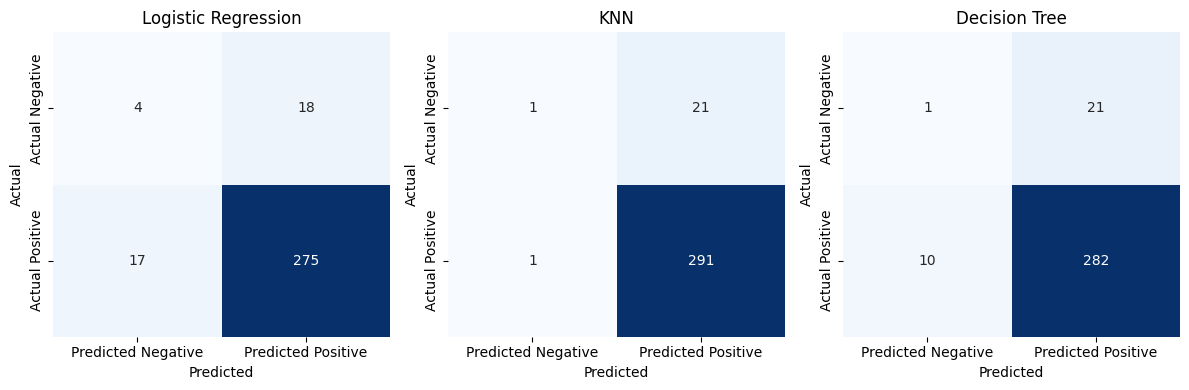

In [116]:
import seaborn as sb
from sklearn.metrics import confusion_matrix

confusion1 = confusion_matrix(y_test, y_pred_reg)
confusion2 = confusion_matrix(y_test, y_pred_knn)
confusion3 = confusion_matrix(y_test, y_pred_tree)

# Print confusion matrix
print("Confusion Matrix Logistic Regression:")
print(confusion1)

plt.figure(figsize=(12, 4))

# Plot the first heatmap
plt.subplot(131)  # 1 row, 3 columns, plot in the first position
sb.heatmap(confusion1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression')

# Plot the second heatmap
plt.subplot(132)  # 1 row, 3 columns, plot in the second position
sb.heatmap(confusion2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN')

# Plot the third heatmap
plt.subplot(133)  # 1 row, 3 columns, plot in the third position
sb.heatmap(confusion3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree')

plt.tight_layout()
plt.show()

## Check Accuracy

We observe a fairly good accuracy, meaning that the logistic regression model is making mostly correct predictions on the test dataset, which suggests that the model is performing well in the context of this specific problem. 

KNN performs the best out of all three models when it comes to accuracy, however the logistic regression and decision tree models are not far behind.

In [117]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_reg)
print(f'Logistic Regression Accuracy: {accuracy:.3f}')

accuracy = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy:.3f}')

accuracy = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy:.3f}')

Logistic Regression Accuracy: 0.889
KNN Accuracy: 0.930
Decision Tree Accuracy: 0.901


## Check precision, recall, and F1-scores

These scores indicate that the logistic regression model is doing well in correctly identifying positive and negative instances while also minimizing false positives and false negatives. The logistic regression models has the highest precision score out of all 3 models. Additionally, it has competitive recall and f1 scores when compared to the KNN and decision tree models.

In [118]:
from sklearn.metrics import precision_score, recall_score, f1_score

model_name = ['Logistic Regression', 'KNN', 'Decision Tree']
model_predictions = [y_pred_reg, y_pred_knn, y_pred_tree]

for name, pred in zip(model_name, model_predictions):
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    print(name)
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-Score: {f1:.3f}')
    print("")

Logistic Regression
Precision: 0.939
Recall: 0.942
F1-Score: 0.940

KNN
Precision: 0.933
Recall: 0.997
F1-Score: 0.964

Decision Tree
Precision: 0.931
Recall: 0.966
F1-Score: 0.948

